Homework #1 (100 points)

This homework will involve  the ‘Cars’ data set that is available on SAS Enterprise Guide in the SAS-Help directory, as well as in Doc Sharing.

Please submit responses to the following questions, including plots and analysis, to the Week 1.

1. Generate a scatter plot matrix of the following continuous variables:  (20 pts). Briefly explain the relationships that you see. 

    a. MSRP, Invoice, Horsepower, MPG Highway and MPG City
    

2. Use t-tests  to accept or reject the statements listed below. State conclusions using the terminology of hypothesis testing:   (20 pts)

    a. There is no difference in mileage between ‘Front’ drive and All-wheel drive
    
    b. There is no difference in the cost between Wagon and Sedan vehicles.
    
    c. There is no difference in cost between vehicles from the USA versus vehicles from Europe.


3. Provide estimates and standard errors for:   (10 pts)

    a. Mean  Mileage for All Vehicles
    
    b. MSRP variance for vehicles from USA
   

4. Create a regression model that predicts the gas mileage for each vehicle using two models: (50 pts)

    a. A bi-variate model using one continuous variable of your choosing.
    
    b. A multiple regression model using three continuous variables of your choosing.
    
    
Explain the tabular and graphical output that is produced by SAS. You needn't explain the advanced  plots (such as residual analysis) that we haven't covered in class yet.

Click on the "Week One Assignment" link above to submit your assignment, as well as to get more information regarding the due date and grading rubric.

### Question 1a

In [30]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("/Users/RyanPaw/ANA620/Cars.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [4]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [5]:
df_copy = df.copy()

In [6]:
df_copy['MSRP'] = df_copy['MSRP'].str.replace(',','').str.replace('$','').astype('float')
df_copy['Invoice'] = df_copy['Invoice'].str.replace(',','').str.replace('$','').astype('float')

In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    float64
 6   Invoice      428 non-null    float64
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 50.3+ KB


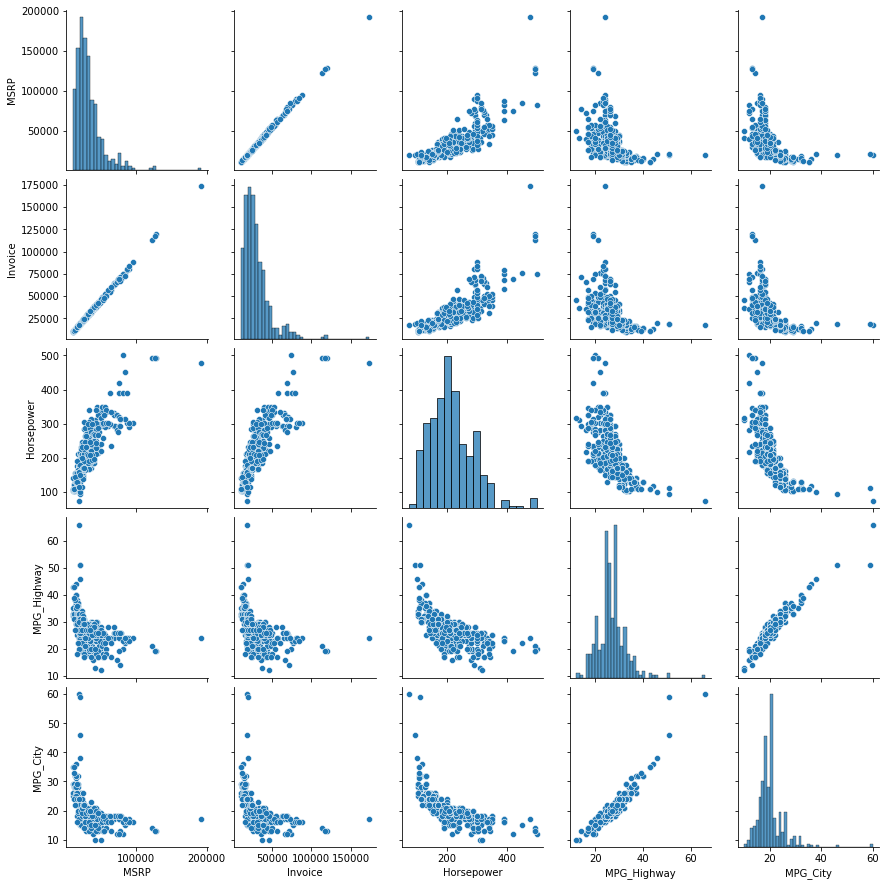

In [10]:
spm = sns.pairplot(df_copy, vars=["MSRP", "Invoice", "Horsepower", "MPG_Highway", "MPG_City"], kind="scatter")

Our scatter plot matrix shows multiple positive/negative relationships between our variables. 

There is a positive relationship between these variables: MSRP and Invoice, MPG_Highway and MPG_City, MSRP and Horsepower, Invoice and Horsepower. As one variable increases, the other variable also increases. 

There is a negative relationshp between these variables: MSRP and MPG_Highway, MSRP and MPG_City, Invoice and MPG_Highway, Invoice and MPG_City. As one variable increases, the other variable decreases. 

### Question 2a

In [11]:
df['DriveTrain'].value_counts()

Front    226
Rear     110
All       92
Name: DriveTrain, dtype: int64

In [20]:
stats.ttest_ind(df['MPG_City'][df['DriveTrain'] == 'All'],
                df['MPG_City'][df['DriveTrain'] == 'Front'])

Ttest_indResult(statistic=-8.133773833315288, pvalue=9.603038797217511e-15)

The t-test value resulted in -8.13 and a p-value of < 0.0001. This shows there is a statistically significant difference between the mileage for all-wheel and front-wheel drive cars. Therefore, we can reject the null hypothesis (H0). 

### Question 2b

In [12]:
df['Type'].value_counts()

Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
Name: Type, dtype: int64

In [19]:
stats.ttest_ind(df_copy['MSRP'][df_copy['Type'] == 'Sedan'],
                df_copy['MSRP'][df_copy['Type'] == 'Wagon'])

Ttest_indResult(statistic=0.3174241838281365, pvalue=0.7511501778172978)

The t-test value resulted in 0.32 and a p-value of 0.75. This shows there is a very low statistically significant difference between cost for Wagon and Sedan cars because of our low t-test value and a p-value > 0.05. Therefore, we CANNOT reject the null hypothesis (H0).

### Question 2c

In [16]:
df['Origin'].value_counts()

Asia      158
USA       147
Europe    123
Name: Origin, dtype: int64

In [21]:
stats.ttest_ind(df_copy['MSRP'][df_copy['Origin'] == 'Europe'],
                df_copy['MSRP'][df_copy['Origin'] == 'USA'])

Ttest_indResult(statistic=8.5368542432442, pvalue=1.0436671157614213e-15)

The t-test value resulted in 8.54 and a p-value of < 0.0001. This shows there is a statistically significant difference between cost for USA and European cars. Therefore, we can reject the null hypothesis (H0).

### Question 3a

In [25]:
df_copy['MPG_City'].mean()

20.060747663551403

In [27]:
from scipy.stats import sem
sem(df_copy['MPG_City'])

0.25319880644223236

The mean mileage for all vehicles in this dataset is 20.06. The standard error is 0.2532.

### Question 3b

In [33]:
import statistics
statistics.variance(df_copy['MSRP'][df_copy['Origin'] == 'USA'])

137170534.22094867

In [34]:
sem(df_copy['MSRP'][df_copy['Origin'] == 'USA'])

965.988036083674

MSRP variance for vehicles from USA is 137170534.22. The standard error is 965.99.

### Question 4a

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
x = df['EngineSize'].values.reshape(-1,1)
y = df['MPG_Highway'].values

In [95]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [96]:
model.coef_

array([-3.71476842])

In [97]:
model.intercept_

38.71856577010156

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'MPG_Highway')

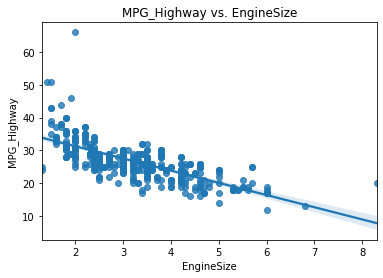

In [107]:
sns.regplot(x, y)

plt.title('MPG_Highway vs. EngineSize')
plt.xlabel('EngineSize')
plt.ylabel("MPG_Highway")

I chose MPG_Highway as my dependent variable, and I chose EngineSize as my independent variable. In my bivariate model, I am modeling highway mileage with respect to EngineSize. 

After fitting the linear equation, I obtained this model:

MPG_Highway = 38.719 - 3.715 * EngineSize

This shows that the highway mileage has a negative relationship with the size of the car's engine. As the mileage on the car increases, the engine size decreases. 

### Question 4b

In [102]:
X = df[['EngineSize','Weight','Horsepower']]
Y = df['MPG_Highway'].values

In [103]:
reg = LinearRegression()
reg.fit(X, Y)

LinearRegression()

In [105]:
reg.coef_

array([-0.23351632, -0.00463223, -0.01801445])

In [106]:
reg.intercept_

48.052925343575716

I chose MPG_Highway as my dependent variable, and I chose EngineSize, Weight, and Horsepower as my continuous independent variables. In my multiple regression model, I am modeling highway mileage with respect to EngineSize, Weight, and Horsepower.

After fitting the linear equation, we obtain the following multiple linear regression model:

MPG_Highway = 48.053 - 0.234 * EngineSize - 0.005 * Weight - 0.018 * Horsepower

This also shows that the highway mileage has a negative relationship with the size of the car's engine, weight, and horsepower.